<a href="https://colab.research.google.com/github/dsdayat/HW_Regreesion-Ridge-and-Laso/blob/main/HW_Regresion_Agus_Nur_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instructions**

1. Split data: train - validate - test (point: 10)
2. Draw correlation plot on training data and perform feature selection on
highly correlated features (point: 10)
3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10]) (point:50)

  a. Ridge regression (point: 25)

  b. LASSO (point: 25)
4. Choose the best lambda from the validation set (point: 20)

  a. Use RMSE as metric

  b. Interpret a sample of the coefficients of the best model

  i. Ridge regression
  ii. LASSO

5. Evaluate the best models on the test data (+ interpretation) (point: 10)

  a. MAE
  b. MAPE
  c. RMSE

**Dataset Description of Boston Housing 1978**

*The data is about predicting housing price (medv) in Boston cit*y


- CRIM per capita crime rate by town 
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town.
- CHAS Charles River dummy variable (1 if tract  bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- Black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

In [283]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [284]:
df=pd.read_csv('boston.csv')

In [285]:
df.shape

(506, 14)

In [286]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# **PreProcessing Data**
*Data Cleaning*
- Mising Value Check
- Duplicated data Check
- Combine numericals data Check
- Outlier check
- Distribution check

In [287]:
df.isna().sum() * 100 / len(df)

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
medv       0.0
dtype: float64

There is no Missing Value

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


All Data type are numerical

In [289]:
df.duplicated().sum()

0

In [290]:
df = df.drop_duplicates()#drop kalo ada duplicated data

In [291]:
df.duplicated().sum()#cek lagi ada duplicated atau engga

0

there is no Duplicated data

In [292]:
#create gruoup numericals, for checking outliers.
nums = ['crim','zn','indus'	,'chas','nox','rm','age','dis',	'rad','tax','ptratio','black','lstat','medv']

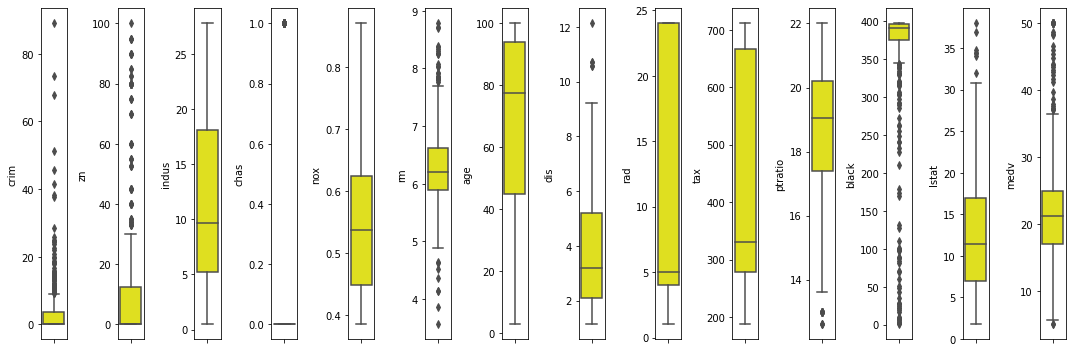

In [293]:
plt.figure(figsize=(15,5))

features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='yellow')
    plt.tight_layout()

there are so many outliers in feature: ['crim', 'zn', 'rm','ptratio','black','lstat','medv'.]
- Since the medv is the target  and has outlier.
- Since All of outliers represent true values from **natural variation** in the population we can ignore the outliers
- lear further more on data describe below




In [294]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

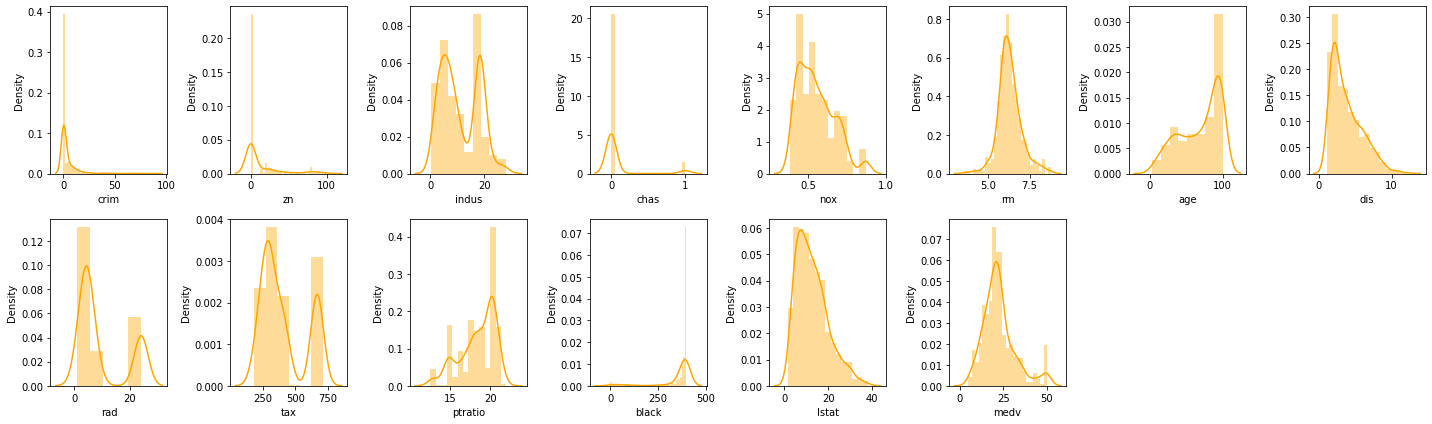

In [295]:
plt.figure(figsize=(20,6))
features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='orange')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation Distribution Column
- symetric feature are : chas,indus, rm, rad, tax, black, medv
- Postive skewed are :crim, zn, nox, dis, lstat, 
- Negative skewed are : age, ptratio 
- Since the medv is target, the medv has normal distribution with few outliers

In [296]:
dfn=df.copy()

In [297]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [298]:
dfn['outlier_medv']=check_outlier(data=dfn,column='medv')

In [299]:
dfn[dfn['outlier_medv']=='outlier']

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,outlier_medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7,outlier
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,outlier
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3,outlier
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0,outlier
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0,outlier
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0,outlier
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0,outlier
179,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2,outlier
180,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8,outlier
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9,outlier


In [300]:
dfn[dfn['outlier_medv']=='outlier'].count()* 100 / len(df)

crim            7.905138
zn              7.905138
indus           7.905138
chas            7.905138
nox             7.905138
rm              7.905138
age             7.905138
dis             7.905138
rad             7.905138
tax             7.905138
ptratio         7.905138
black           7.905138
lstat           7.905138
medv            7.905138
outlier_medv    7.905138
dtype: float64

Observation
- There are about 7.9% Outlier through medv
- Medv Outlier is only a few and represent true values from natural variation in the population
- Judgement : Ignore Outlier (Confirmed by. Kak Imam)

# **1. Split data: train - validate - test (point: 10)**


In [301]:
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [302]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

# First splitting: pretrain and test
feature_medv_pretrain, feature_medv_test, target_medv_pretrain, target_medv_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_medv_train, feature_medv_validation, target_medv_train, target_medv_validation = train_test_split(feature_medv_pretrain, target_medv_pretrain, test_size=0.20, random_state=42)

# **2. Draw correlation plot on training data and perform feature selection on highly correlated features (point: 10)**


In [303]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


Standard rule for VIF :
- VIF == 1 → No multicollinearity
- VIF between 4 and 10 → Moderate multicollinearity
- VIF > 10 → Severe multicollinearity

Actual Data : 
- There are No Multicol except **['tax','rad','dis' and 'nox']**
- **['tax','rad','dis' and 'nox']** are Moderate Multicol
- There is no Severe multicol

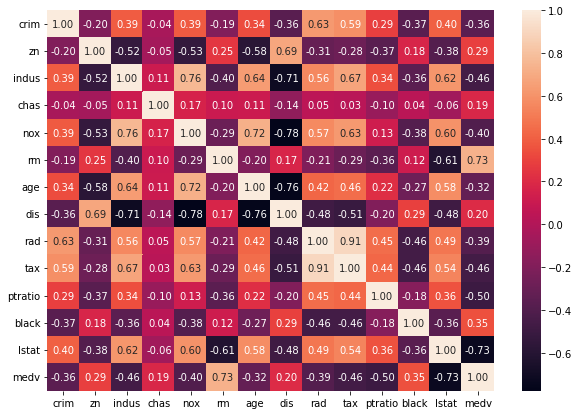

In [304]:
# heatmap correlation
medv_train = pd.concat([feature_medv_train, target_medv_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

*Standard Rule of high corr*

Threshold: abs(corr) >= 0.8, 

*Actual observation from heatmap*
- There are strong corr between rad (0.91) and tax (0.91), anyway just drop thi lower value between rad and tax toward medv.
drop rad (-0.39) 


In [305]:
#feature high coor >=0.8 will be drop
feature_medv_train = feature_medv_train.drop(columns=['rad']) 
feature_medv_validation = feature_medv_validation.drop(columns=['rad']) 
feature_medv_test = feature_medv_test.drop(columns=['rad'])

In [306]:
# Recheck VIF scores after drop
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


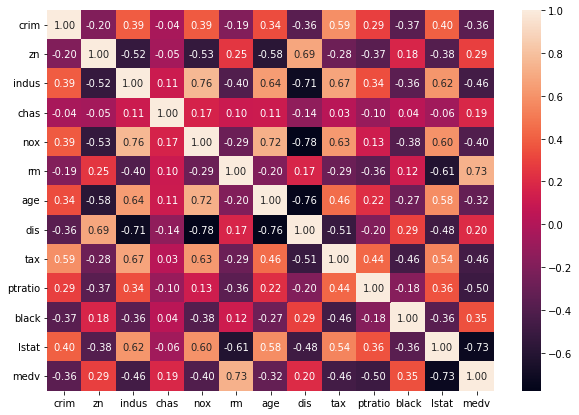

In [307]:
# recheck heatmap correlation
medv_train = pd.concat([feature_medv_train, target_medv_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

# **3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10]) (point:50)**

  a. Ridge regression (point: 25)




In [308]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_medv_train, y_medv_train)
ridge_reg_pointone.fit(X_medv_train, y_medv_train)
ridge_reg_one.fit(X_medv_train, y_medv_train)
ridge_reg_ten.fit(X_medv_train, y_medv_train)

Ridge(alpha=10, random_state=42)

  b. LASSO (point: 25)

In [310]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_rega = Lasso (alpha=0.01, random_state=42)
lasso_regb = Lasso (alpha=0.1, random_state=42)
lasso_regc = Lasso(alpha=1, random_state=42)
lasso_regd = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_rega.fit(X_medv_train, y_medv_train)
lasso_regb.fit(X_medv_train, y_medv_train)
lasso_regc.fit(X_medv_train, y_medv_train)
lasso_regd.fit(X_medv_train, y_medv_train)

Lasso(alpha=10, random_state=42)

# **4. Choose the best lambda from the validation set (point: 20)**

  a. Use RMSE as metric

  b. Interpret a sample of the coefficients of the best model

  i. Ridge regression

  ii. LASSO



Ridge find the best alpha using validation set

In [312]:
#Ridge
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.960676932957843
RMSE of Lasso regression model with alpha = 0.1 is 4.949412535122791
RMSE of Lasso regression model with alpha = 1.0 is 4.912351371579991
RMSE of Lasso regression model with alpha = 10 is 4.871717983886228


Ridge with Alpha 10 is The best (4.87)

In [313]:
#Lasso
from sklearn.metrics import mean_squared_error

X_traffic_validation = feature_medv_validation.to_numpy()
y_traffic_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_traffic_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_rega,
          lasso_regb,
          lasso_regc,
          lasso_regd]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_traffic_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso regression model with alpha = 1.0 is 4.845855910636398
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


Lasso with alpha 1.0 is The Best (4.84)

# **Diagnostik Study** not mandatory
goals the diagnostic study by Rsquare is to get the reason about why the performance of the model good or not good. 

In [317]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


In [318]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train)))

R-squared for training data is 0.748587526366982


Treshold rquare = Strong=>0.67 Moderate=>0.33 Weak=>0.19

Since The result is 0.74, we can explain why the performance the model is good

In [315]:
lasso_best = lasso_regc

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


In [316]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train)))

R-squared for training data is 0.7056815963218595


Treshold rquare = Strong=>0.67 Moderate=>0.33 Weak=>0.19

Since The result is 0.70, we can explain why the performance the model is good

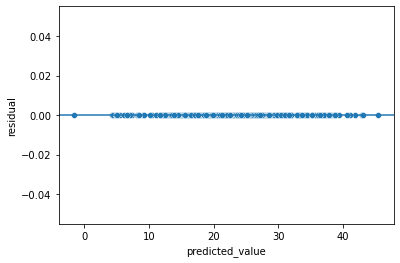

In [319]:
# calculate residuals
residual = y_medv_train - y_medv_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Cek asumsi:
1. Linear relationship: Rather OK. Karena garis mewakili scater
2. Variance konstan: OK.Karena variasi titik scatter tidak menyebar cenderung segaris dengan line
3. Residual independent: OK, karena pola titik scater dapat segaris dengan line

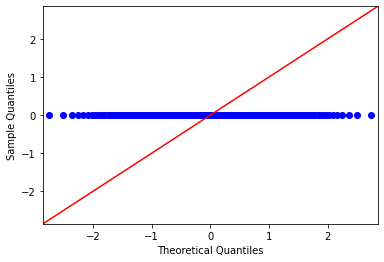

In [339]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

# **5. Evaluate the best models on the test data (+ interpretation) (point: 10)**

  a. MAE

  b. MAPE

  c. RMSE

Training Error Ridge

In [320]:
# prepare prediction result on training data Ridge
y_predict_train = ridge_best.predict(X_medv_train)

In [321]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train)))

RMSE for training data is 4.778640361040111
MAE for training data is 3.3776762058865626
MAPE for training data is 0.16868073663359498


Testing Error ridge

In [327]:
X_medv_test = feature_medv_test.to_numpy()
y_predict_test = ridge_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [328]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test)))

RMSE for testing data is 5.158908333657057
MAE for testing data is 3.2444816457044965
MAPE for testing data is 0.17618402626767926


In [337]:
SM = (0.17618402626767926-0.16868073663359498)*100 #Selisih MAPE
print(SM,'%')

0.7503289634084281 %


*Inference*

Treshold GAP betwween Training and testing  MAPE based on Mentor rules of thumb OK<10%>NG

- The Model using Ridge is Good SM=0.75%


Training Error Lasso

In [322]:
# prepare prediction result on training data Lasso
y_predict_train = lasso_best.predict(X_medv_train)


In [323]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train)))

RMSE for training data is 5.170346463296143
MAE for training data is 3.6858416211465084
MAPE for training data is 0.1749128202363825


Testing Error Lasso

In [329]:
X_medv_test = feature_medv_test.to_numpy()
y_predict_test = lasso_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [330]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.17856606338732206


In [338]:
SML=(0.17856606338732206-0.1749128202363825)*100
print(SML, '%')

0.3653243150939567 %


Inference LASSO

Treshold GAP betwween Training and testing  MAPE based on Mentor rules of thumb OK<10%>NG

- The Model with Lasso is Good SML=0.36%

- **The Best Model is Model with Lasso** since the percentage of SML (Lasso) 0.36% less than SM (Ridge) 0.75%

- Both Ridge and Lasso Model are not overfit or